In [1]:
import sqlite3 
import pandas 
import matplotlib

In [2]:
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

In [24]:
cur.execute('''
CREATE TABLE sales (
    order_id VARCHAR(15) PRIMARY KEY NOT NULL,
    product TEXT,
    units_sold INTEGER,
    unit_price DOUBLE,
    total_revenue DOUBLE);''')

OperationalError: table sales already exists

In [25]:
sample_data=[
    ("ORD200478", "Tablet", 3, 62.77, 188.31),
    ("ORD200278", "Laptop", 5, 362.46, 1812.3),
    ("ORD200582", "Tablet", 3, 474.14, 1422.42),
    ("ORD200728", "Desk", 4, 325.76,1303.04),
    ("ORD200740", "Desk", 2, 377.47, 754.94),
    ("ORD200186", "Phone", 2, 133.55, 267.1),
    ("ORD200698", "Laptop", 2, 388.22, 776.44),
    ("ORD201017","Chair",2, 680.85, 1361.7),
    ("ORD200110","Tablet", 1, 220.77, 220.77),
    ("ORD200726","Laptop",4, 583.02, 2332.08)]

In [32]:
cur.executemany(
    "INSERT INTO sales (order_id, product, units_sold, unit_price, total_revenue) VALUES (?, ?, ?, ?, ?)",
    sample_data)

In [7]:
cur.execute('SELECT * FROM sales')   # run the query
rows = cur.fetchall()                # get all results
print(rows)                          # shows results


[('ORD200478', 'Tablet', 3, 62.77, 188.31), ('ORD200278', 'Laptop', 5, 362.46, 1812.3), ('ORD200582', 'Tablet', 3, 474.14, 1422.42), ('ORD200728', 'Desk', 4, 325.76, 1303.04), ('ORD200740', 'Desk', 2, 377.47, 754.94), ('ORD200186', 'Phone', 2, 133.55, 267.1), ('ORD200698', 'Laptop', 2, 388.22, 776.44), ('ORD201017', 'Chair', 2, 680.85, 1361.7), ('ORD200110', 'Tablet', 1, 220.77, 220.77), ('ORD200726', 'Laptop', 4, 583.02, 2332.08)]


In [8]:
query=('SELECT SUM(total_revenue) FROM sales');
import pandas as pd 
df = pd.read_sql_query(query, conn)
print(df)

   SUM(total_revenue)
0             10439.1


**OR**

In [9]:
cur.execute('SELECT SUM(total_revenue) FROM sales');
for row in cur.fetchall(): print(row)

(10439.1,)


In [27]:
query=('''SELECT product, unit_price,
SUM(units_sold) AS total_units, 
SUM(total_revenue) AS total_product_revenue
FROM sales
GROUP BY product
ORDER BY total_product_revenue DESC
''');
import pandas as pd
df= pd.read_sql_query(query, conn)
print(df);

  product  unit_price  total_units  total_product_revenue
0  Laptop      362.46           11                4920.82
1    Desk      325.76            6                2057.98
2  Tablet       62.77            7                1831.50
3   Chair      680.85            2                1361.70
4   Phone      133.55            2                 267.10


  product  total_product_revenue
0   Chair                1361.70
1    Desk                2057.98
2  Laptop                4920.82
3   Phone                 267.10
4  Tablet                1831.50


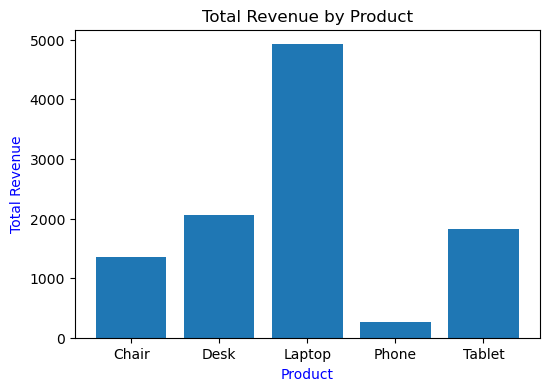

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

query=('''SELECT product, SUM(total_revenue) AS total_product_revenue
FROM sales
GROUP BY product
''');

df= pd.read_sql_query(query, conn)
print(df);
x=df['product']
y=df['total_product_revenue']

plt.figure(figsize=(6,4))
plt.bar(x, y, label='Revenue by Product')
plt.title('Total Revenue by Product')
plt.xlabel('Product', color='blue')
plt.ylabel('Total Revenue', color='blue')
plt.show()
